# Exercise 6.3
## Geographical Visualizations with Python

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

# Import the 'folium' library

In [15]:
%matplotlib inline

In [16]:
country_geo = r'/Users/carolinazea/OneDrive/CareerFoundry/Achievement 6/files/neighbourhoods.geojson'
# Import ".geojson" file for NYC - provided by source: http://insideairbnb.com/new-york-city

In [17]:
f = open(r'/Users/carolinazea/OneDrive/CareerFoundry/Achievement 6/files/neighbourhoods.geojson',)
  
data = json.load(f)
  
for i in data['features']:
    print(i)
    
#preview of GEOJSON file

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-73.766708, 40.614911], [-73.768253, 40.614878], [-73.773977, 40.616004], [-73.773631, 40.616327], [-73.768735, 40.620901], [-73.767459, 40.620511], [-73.766978, 40.616919], [-73.766708, 40.614911]]]]}, 'properties': {'neighbourhood': 'Bayswater', 'neighbourhood_group': 'Queens'}}
{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-73.848597, 40.87167], [-73.845823, 40.870239], [-73.854559, 40.859954], [-73.854665, 40.859586], [-73.856389, 40.857594], [-73.868882, 40.857223], [-73.868318, 40.857862], [-73.869554, 40.857784], [-73.871025, 40.85731], [-73.870481, 40.865414], [-73.870555, 40.869703], [-73.867216, 40.86969], [-73.85745, 40.869533], [-73.85555, 40.871813], [-73.853598, 40.873288], [-73.848597, 40.87167]]]]}, 'properties': {'neighbourhood': 'Allerton', 'neighbourhood_group': 'Bronx'}}
{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-73.782822, 40.8

In [18]:
path = r'/Users/carolinazea/OneDrive/CareerFoundry/Achievement 6'

In [19]:
df = pd.read_csv(os.path.join(path,'files', '2021_NYC_Airbnb_Data.csv'))
#  Export dataset

In [20]:
pd.set_option('display.max_columns', None)
df.head()
# Displays all columns for visualization purposes

host_id host_since  host_response_time host_is_superhost  \
0   191091     8/4/10  Within A Few Hours         Superhost   
1   244071    9/24/10      Within An Hour         Superhost   
2   503800    4/12/11      Within An Hour         Superhost   
3   262812   10/15/10        Within A Day   Not a Superhost   
4   663384     6/4/11        Within A Day         Superhost   

         host_has_profile_pic  host_identity_verified     neighbourhood  \
0  Host has a Profile Picture  Host identity verified           Tribeca   
1  Host has a Profile Picture  Host identity verified  Ditmars Steinway   
2  Host has a Profile Picture  Host identity verified     Crown Heights   
3  Host has a Profile Picture  Host identity verified      Williamsburg   
4  Host has a Profile Picture  Host identity verified        Park Slope   

  neighbourhood_group  latitude  longitude            property_type  \
0           Manhattan  40.72100  -74.00971       Entire rental unit   
1              Queens  40.77868  -73.90652       Entire rental unit   
2            Brooklyn  40.67654  -73.94629       Entire rental unit   
3            Brooklyn  40.71983  -73.95992       Entire rental unit   
4            Brooklyn  40.67494  -73.97792  Entire residential home   

         room_type  property_accommodates property_bathrooms  price  \
0  Entire home/apt                      6             1 bath    250   
1  Entire home/apt                      4             1 bath    140   
2  Entire home/apt                      4             1 bath    101   
3  Entire home/apt                      6             1 bath    250   
4  Entire home/apt                      5          2.5 baths    275   

   minimum_nights  maximum_nights       has_availability  availability_365  \
0              30              90  Host has availability               298   
1               4            1125  Host has availability               137   
2               1              14  Host has availability               128   
3              30              90  Host has availability                77   
4               5              30  Host has availability                 0   

   number_of_reviews first_review last_review  review_scores_rating  \
0                 13       1/4/20    12/29/20                  4.85   
1                 14      10/5/21     11/9/21                  4.93   
2                 16      5/20/21     11/7/21                  4.88   
3                 57       5/5/19    12/11/19                  4.45   
4                 29       1/2/19    11/28/21                  4.93   

            instant_bookable  
0  Host not instant bookable  
1  Host not instant bookable  
2      Host instant bookable  
3  Host not instant bookable  
4  Host not instant bookable

In [21]:
pd.set_option("max_rows", None)
df.head
# Displays all rows for visualization purposes

<bound method NDFrame.head of         host_id host_since  host_response_time host_is_superhost  \
0        191091     8/4/10  Within A Few Hours         Superhost   
1        244071    9/24/10      Within An Hour         Superhost   
2        503800    4/12/11      Within An Hour         Superhost   
3        262812   10/15/10        Within A Day   Not a Superhost   
4        663384     6/4/11        Within A Day         Superhost   
5        314941   12/10/10      Within An Hour         Superhost   
6         65610   12/25/09      Within An Hour   Not a Superhost   
7       1434931   11/23/11  A Few Days Or More   Not a Superhost   
8       1209728    9/26/11      Within An Hour   Not a Superhost   
9       1681546    1/31/12      Within An Hour         Superhost   
10       718349    6/19/11      Within An Hour         Superhost   
11      4153591   11/14/12        Within A Day         Superhost   
12      3820014    10/9/12      Within An Hour         Superhost   
13      4065620   

In [22]:
df.shape
# Re-checking same # of columns/rows

(6716, 24)

## Consistency checks 

In [23]:
df.isnull().sum()
#No missing values

host_id                   0
host_since                0
host_response_time        0
host_is_superhost         0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood             0
neighbourhood_group       0
latitude                  0
longitude                 0
property_type             0
room_type                 0
property_accommodates     0
property_bathrooms        0
price                     0
minimum_nights            0
maximum_nights            0
has_availability          0
availability_365          0
number_of_reviews         0
first_review              0
last_review               0
review_scores_rating      0
instant_bookable          0
dtype: int64

In [24]:
dups = df.duplicated()

In [25]:
dups.shape
#No duplicates

(6716,)

### Checking extreme value for variable - 'Price'

<AxesSubplot:xlabel='price', ylabel='Count'>

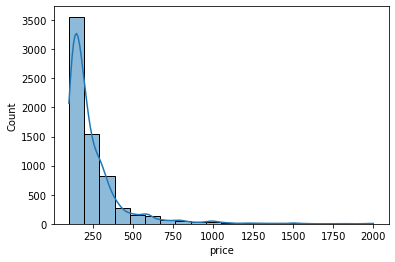

In [26]:
sns.histplot(df['price'], bins=20, kde = True)
#  Price ranges do not have extreme values. In some cases based on the chart below, some 
#  hosts lists their proprty for $1000 - this can be a high rise location based in Manhattan. 
#  My hypothesis is that location determines price setting with Manhattan being the highest listed properties.

### Checking extreme value for variable - 'number_of_reviews'

<AxesSubplot:xlabel='number_of_reviews', ylabel='Count'>

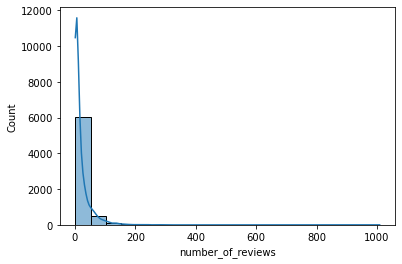

In [27]:
sns.histplot(df['number_of_reviews'], bins=20, kde = True)
#  Number of reviews range from 0 to 200 - this is not uncommon as Airbnb hosts can have a history of 
#  renting our their property for years. 
#  At other times, Airbnb hosts do not have reviews if they signed up recently.

### Checking extreme value for variable - review_scores_rating'

<AxesSubplot:xlabel='review_scores_rating', ylabel='Count'>

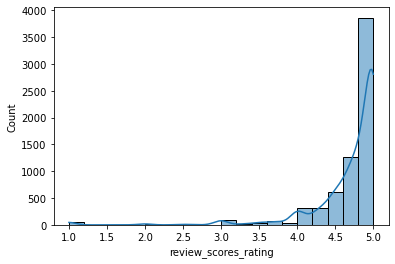

In [28]:
sns.histplot(df['review_scores_rating'], bins=20, kde = True)
#  The chart below indicates there is no outlier of score ratings. 

## Choropleth Map

In [39]:
data_to_plot = df[['neighbourhood','review_scores_rating']]
data_to_plot.head()

neighbourhood  review_scores_rating
0           Tribeca                  4.85
1  Ditmars Steinway                  4.93
2     Crown Heights                  4.88
3      Williamsburg                  4.45
4        Park Slope                  4.93

In [37]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['neighbourhood', 'review_scores_rating'],
    key_on = 'feature.properties.neighbourhood', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

In [38]:
map

In [ ]:
#  I had to zoom in US --> NYC to see the choropleth map, not sure if that is user error

In [40]:
map.save('plot_data.html')

### Does the analysis answer any of your existing research questions?
### Does the analysis lead you to any new research questions?

### I decided to incorporate the Neighbourhoods variable into the choropleth map since specific neighborhoods within the five boroughs can give us a more descriptive story as far as ratings. If I were to use boroughs instead, the visual presentation would be skewed to the audience since Staten Island for example is a large island compared to Manhattan or Queens. The audience can infer at that point that there are more listings in Staten Island due to geographical size which is not the case. 

### I could not understand however why 'data_to_plot' only implemented scores higher than 4.0. When analyzing the score ratings in the beginning of the project, there were ratings that ranged from 1 to 5, but I assumed there were few instances of such occurence that it wasn't populated when I created the dataset. 

### The analysis brings up another question I would like answered - What determines the rating score of an Airbnb listing? The initial dataset had ratings consisting of cleanliness, host responsive rate, location, checkin, and host communication. 

### That being said, should I include those ratings into the dataset or continue without?
